# Continuous Control -- REPORT

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

# Warning!!! Always Restart and Clear Output before rerunning. Get Weird Errors otherwise as noted below....

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
# KAE 3/19/2022: normally provided later in the script, but need 
#  torch for the check of the GPU, so put up at the top 
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import random
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

# NOTE: you need to click on the Unity popup in order to function!!!

In [3]:
# KAE: windows-specific environment specification
env = UnityEnvironment(file_name='.\Reacher.exe')
#env = UnityEnvironment(file_name='.\Reacher_Windows_x86_64\Reacher.exe')


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment for training
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [6]:
 torch.cuda.is_available ()

True

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

### NOTE: Next section is the provided "training" environment of random selections

In [7]:
#env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#while True:
#    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#    next_states = env_info.vector_observations         # get next state (for each agent)
#    rewards = env_info.rewards                         # get reward (for each agent)
#    dones = env_info.local_done                        # see if episode finished
#    scores += env_info.rewards                         # update the score (for each agent)
#    states = next_states                               # roll over states to next time step
#    if np.any(dones):                                  # exit loop if episode finished
#        break
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [8]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [9]:
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    


In [10]:
len(states)

20

### As noted above if you don't restart and clear output before rerunning you will get strange errors, issues in the below section of code
Weird and stupid errors here -- even if I replace the stupid_Agent.py file with EXAMPLE_Agent.py file and then import stupid_Agent it bombs, also putting my code into EXAMPLE_Agent.py; don't know why this is a problem
EXAMPLE ATTEMPS:
#from EXAMPLE_Agent import Agent
#from EXAMPLE_Agent_orig import Agent
#from stupid_Agent import Agent
#from MYAgent import Agent

FOUND PROBLEM: need to always restart and clear output before each attempt!



In [11]:

from ddpg_agent import Agent


In [12]:
agent = Agent(state_size = state_size, action_size = action_size, 
              num_agents = num_agents, random_seed=2)

In [13]:
# KAE 3/18/2022: this initial function is missing a number of 
#  possible desirable features:
# 1) N-step sampling 
# 2) clipped gradient (in ddpg_agent)
# 3) wait c steps before updating the actor and critic networks

# HOWEVER, they were not found to be needed

# KAE 3/18/2022: trying to avoid global variables used in functions :(
#   so passing in env_info, brain_name, agent (from above)
def ddpg_train(env, brain_name, agent, n_agents=1, n_episodes=1000, print_every=100, moving_avg=100):
    # KAE this is useful previously to provide a 'last moving_avg' sample for the moving average
    nscores_deque = deque(maxlen=moving_avg)
    nscores = []
    nmean_scores = []
    nbest_mean = -100
    # KAE 3/19/2022: 1st time through we got learning score >36 but 
    #  reloading gave us a mean of 34, so allow for 10% over
    MAX_SCORE = 33.0
    # KAE 3/19/2022: print the requirement score as well
    REQ_SCORE = 30.0
    for i_episode in range(1, n_episodes+1):
        # KAE NOTE: original DDPG had just env.reset() but that 
        #   didn't work, so included [brain_name]
        env_info = env.reset()[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(n_agents)
        mean_score = 0
        while True:
            # we were dying here when not restart, clear ....
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            # key added command for training to save etc the current step for training
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards                                  # update the score (for each agent)
            if np.any(dones):
                break 
        nscores_deque.append(score)
        nscores.append(score)
        mean_score = np.mean(nscores_deque)
        # this gives us the mean score 100 sample mean score for plotting
        nmean_scores.append(mean_score)
        # THis line remains in place, from the DDPG previous example....
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_score), end="")
        # only save the current score if it is better than previous save....
        if mean_score > nbest_mean:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            nbest_mean = mean_score
        # document the ongoing process....
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_score))
        if mean_score > REQ_SCORE:
            print('\rRequirement met on Episode {}\tRequirement Average Score: {:.2f}'.format(i_episode, mean_score))
        if mean_score > MAX_SCORE:
            print('\rFinal Episode {}\tFinal Average Score: {:.2f}'.format(i_episode, mean_score))
            break
            
    return nscores, nmean_scores



In [14]:
import datetime

In [15]:
#n_episodes = 200
# KAE 3/19/2022, previously 200 was overkill
n_episodes = 175
print_every = 10
tstart = datetime.datetime.now()
scores, mean_scores = ddpg_train(env, brain_name, agent, n_agents=num_agents, 
                                 n_episodes=n_episodes, print_every=print_every)
# moved this up here as for some reason our solution stopped so lost the times
tend = datetime.datetime.now()


C:\Users\Kirk\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 10	Average Score: 0.81
Episode 20	Average Score: 2.00
Episode 30	Average Score: 5.19
Episode 40	Average Score: 11.62
Episode 50	Average Score: 16.81
Episode 60	Average Score: 20.20
Episode 70	Average Score: 22.59
Episode 80	Average Score: 24.39
Episode 90	Average Score: 25.80
Episode 100	Average Score: 26.93
Requirement met on Episode 109	Requirement Average Score: 30.21
Episode 110	Average Score: 30.56
Requirement met on Episode 110	Requirement Average Score: 30.56
Requirement met on Episode 111	Requirement Average Score: 30.91
Requirement met on Episode 112	Requirement Average Score: 31.25
Requirement met on Episode 113	Requirement Average Score: 31.59
Requirement met on Episode 114	Requirement Average Score: 31.93
Requirement met on Episode 115	Requirement Average Score: 32.26
Requirement met on Episode 116	Requirement Average Score: 32.58
Requirement met on Episode 117	Requirement Average Score: 32.91
Requirement met on Episode 118	Requirement Average Score: 33.23
Final Epi

In [16]:
dtime = tend - tstart
dt_e = float(dtime.total_seconds()) / float(n_episodes)
print('DDPG learning took ',dtime,'or ',dt_e,' seconds per episode')

DDPG learning took  0:31:48.206250 or  10.904035714285714  seconds per episode


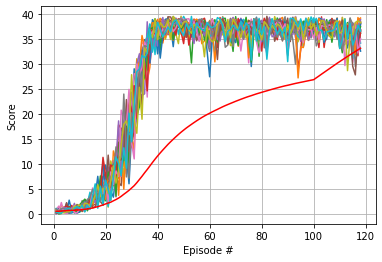

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores,label='scores')
plt.plot(np.arange(1, len(mean_scores)+1), mean_scores,'r-',
         label='mean scores')
plt.grid()
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [18]:
# KAE 3/19/2022: here we reload the saved trained models (both actor and critic)
#   for a "replay" to demonstrate that our trained solution gives us 
#   good solutions (still)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

# do only one "episode"
score = np.zeros(num_agents)
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations
agent.reset()
# keep track of the number of turns so can get a running count
icnt=0
while True:
    actions = agent.act(states, add_noise=False)
    env_info = env.step(actions)[brain_name]           # send all actions to the environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished

    states = next_states
    score += rewards                                  # update the score (for each agent)
    icnt += 1
    print('\rTurn {}\tRunning Mean Score: {:.2f}'.format(icnt, np.mean(score)), end="")
    if np.any(dones):
        break 
print('\ncurrent test scores:',score)
print('\ncurrent mean score:',np.mean(score))

C:\Users\Kirk\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Turn 1001	Running Mean Score: 38.92
current test scores: [37.50999916 39.49999912 39.35999912 39.51999912 37.99999915 39.58999912
 39.50999912 39.33999912 39.64999911 39.49999912 39.56999912 36.82999918
 39.49999912 39.63999911 39.25999912 39.56999912 37.99999915 38.12999915
 39.58999912 36.80999918]

current mean score: 38.91899913009256


In [19]:
env.close()